In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import sklearn
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
#open-source library developed by Google Primarily for deep learning application. 
from tensorflow import keras 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cirrhosis.csv to cirrhosis.csv


In [ ]:
df = pd.read_csv('cirrhosis.csv')

In [ ]:
df.shape

(418, 20)

In [ ]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
col = ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly','Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper','Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin','Stage']

In [ ]:
float_col = []
for i in col:
  if df[i].dtype == 'float' or 'int':
    float_col.append(i)

In [ ]:
float_col

['N_Days',
 'Status',
 'Drug',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [ ]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
df.drop('ID',axis = 1, inplace = True)

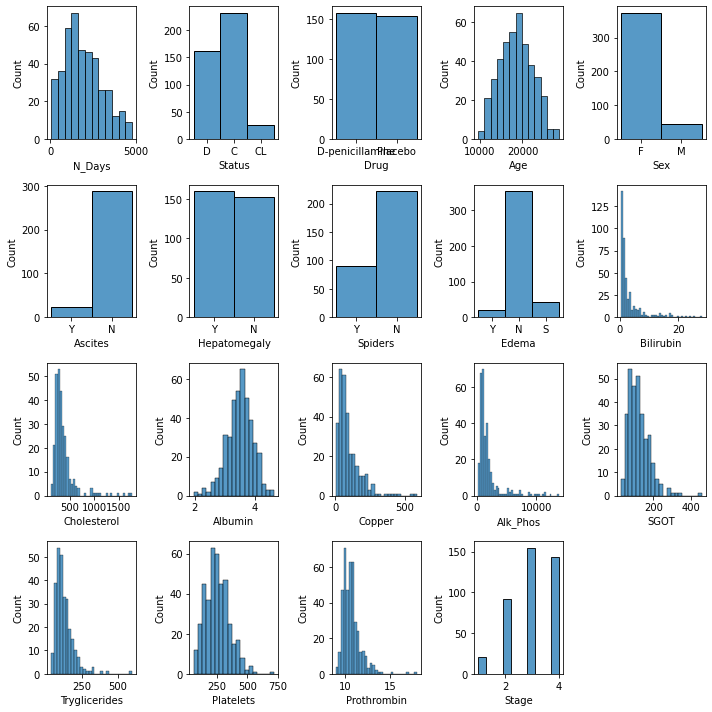

In [ ]:
plt.figure(figsize=(10,10))
c = 1
for i in col:
  plt.subplot(4,5,c)
  sns.histplot(df[i])

  c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
df.Drug.unique()

array(['D-penicillamine', 'Placebo', nan], dtype=object)

In [ ]:
dff = df[(df['Drug']=='D-penicillamine') | (df['Drug']=='Placebo')]  

In [ ]:
dff.isnull().sum()
#Cholesterol (skew), Tri(skew), platelets, copper(skew) 
dff['Cholesterol'] = dff['Cholesterol'].fillna(dff['Cholesterol'].median())
dff['Copper'] = dff['Copper'].fillna(dff['Copper'].median())
dff['Tryglicerides'] = dff['Tryglicerides'].fillna(dff['Tryglicerides'].mean())
dff['Platelets'] = dff['Platelets'].fillna(dff['Platelets'].median())

<ipython-input-15-75ae9bf6b5f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Cholesterol'] = dff['Cholesterol'].fillna(dff['Cholesterol'].median())
<ipython-input-15-75ae9bf6b5f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Copper'] = dff['Copper'].fillna(dff['Copper'].median())
<ipython-input-15-75ae9bf6b5f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
dff.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
co = dff.corr()
co['Stage'].sort_values(ascending = False)

Stage            1.000000
Copper           0.268269
Prothrombin      0.260917
Bilirubin        0.241367
Age              0.168182
SGOT             0.164945
Tryglicerides    0.115358
Alk_Phos         0.041273
Cholesterol      0.009271
Platelets       -0.246951
Albumin         -0.336970
N_Days          -0.371641
Name: Stage, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


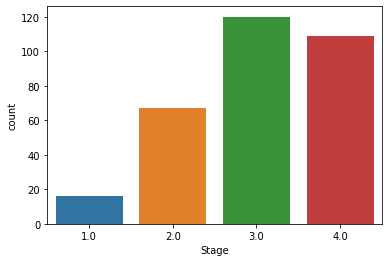

In [ ]:
sns.countplot(dff['Stage'])

In [ ]:
X = dff.iloc[:,0:11]
y = dff['Stage']

In [ ]:
ros = RandomOverSampler(random_state = 0)
X_resampled, y_resampled = ros.fit_resample(X,y)

In [ ]:
data = X_resampled
data['Stage'] = y_resampled


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(480, 12)

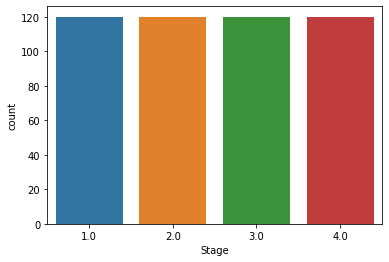

In [ ]:
sns.countplot(data['Stage'])
data.shape

In [ ]:
for column in data:
  if data[column].dtypes == 'object':
    print(f'{column} : {data[column].unique()}')


Status : ['D' 'C' 'CL']
Drug : ['D-penicillamine' 'Placebo']
Sex : ['F' 'M']
Ascites : ['Y' 'N']
Hepatomegaly : ['Y' 'N']
Spiders : ['Y' 'N']
Edema : ['Y' 'N' 'S']


In [ ]:
status_code = {value:key for key, value in enumerate(df['Status'].unique())}
data['Status'] = data['Status'].map(status_code)

drug_code = {value:key for key, value in enumerate(df['Drug'].unique())}
data['Drug'] = data['Drug'].map(drug_code)

sex_code = {value:key for key, value in enumerate(df['Sex'].unique())}
data['Sex'] = data['Sex'].map(sex_code)




In [ ]:

data['Edema'].replace({'Y': 1, 'N': 0, 'S':2},inplace = True)

In [ ]:
yn_col = ['Ascites','Hepatomegaly','Spiders']

for x in yn_col:
  data[x].replace({'Y': 1 , 'N': 0 },inplace = True)

In [ ]:
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Stage
0,400,0,0,21464,0,1,1,1,1,14.5,261.0,4.0
1,4500,1,0,20617,0,0,1,1,0,1.1,302.0,3.0
2,1012,0,0,25594,1,0,0,0,2,1.4,176.0,4.0
3,1925,0,0,19994,0,0,1,1,2,1.8,244.0,4.0
4,1504,2,1,13918,0,0,1,1,0,3.4,279.0,3.0


In [ ]:
X = data.iloc[:,0:11]
y = data['Stage']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =1, stratify= y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
rf_predict = rf.predict(X_test)

In [122]:


rf_cm = confusion_matrix(y_test,rf_predict)
print('Confusion MAtrix of the Model')
print(rf_cm)
print('-----------------------------------------------------------------')
print('\n')

rf_acc = accuracy_score(y_test,rf_predict)
print('Accuracy Score of the Model')
print(rf_acc)
print('-----------------------------------------------------------------')
print('\n')

rf_class = classification_report(y_test,rf_predict)
print('Classification Report of the Model')
print(rf_class)
print('-----------------------------------------------------------------')
print('\n')

Confusion MAtrix of the Model
[[17  7  0  0]
 [ 2 19  1  2]
 [ 2 15  6  1]
 [ 0  1  6 17]]
-----------------------------------------------------------------


Accuracy Score of the Model
0.6145833333333334
-----------------------------------------------------------------


Classification Report of the Model
              precision    recall  f1-score   support

         1.0       0.81      0.71      0.76        24
         2.0       0.45      0.79      0.58        24
         3.0       0.46      0.25      0.32        24
         4.0       0.85      0.71      0.77        24

    accuracy                           0.61        96
   macro avg       0.64      0.61      0.61        96
weighted avg       0.64      0.61      0.61        96

-----------------------------------------------------------------




In [ ]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.377 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.416 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.455 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.403 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.461 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.468 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.494 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.481 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.487 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.351 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

y_predict=grid.predict(X_test)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


In [ ]:
results3=confusion_matrix(y_test,y_predict)
print(results3)

results4=accuracy_score(y_test,y_predict)
print(results4)

results5=classification_report(y_test, y_predict)
print(results5)

[[22  0  0  2]
 [ 2 16  3  3]
 [ 2  9  8  5]
 [ 0  2  5 17]]
0.65625
              precision    recall  f1-score   support

         1.0       0.85      0.92      0.88        24
         2.0       0.59      0.67      0.63        24
         3.0       0.50      0.33      0.40        24
         4.0       0.63      0.71      0.67        24

    accuracy                           0.66        96
   macro avg       0.64      0.66      0.64        96
weighted avg       0.64      0.66      0.64        96



In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')
param_grid_xgb = [{'eta' : [0.005, 0.05, 0.1, 0.3, 0.5], 'max_depth' : [2, 4, 6, 8, 10], 'lambda': [0.25, 0.5, 1, 1.5, 2]}]
grid_search_xgb = GridSearchCV(XGB, param_grid_xgb, cv = 5, scoring = 'roc_auc_ovr', return_train_score = True)
grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(eval_metric='mlogloss',
                                     use_label_encoder=False),
             param_grid=[{'eta': [0.005, 0.05, 0.1, 0.3, 0.5],
                          'lambda': [0.25, 0.5, 1, 1.5, 2],
                          'max_depth': [2, 4, 6, 8, 10]}],
             return_train_score=True, scoring='roc_auc_ovr')

In [ ]:
y_predict = grid_search_xgb.predict(X_test)

In [ ]:
xgb_cm = confusion_matrix(y_test,y_predict)
print('Confusion MAtrix of the Model')
print(xgb_cm)
print('-----------------------------------------------------------------')
print('\n')

xgb_acc = accuracy_score(y_test,y_predict)
print('Accuracy Score of the Model')
print(xgb_acc)
print('-----------------------------------------------------------------')
print('\n')

xgb_class = classification_report(y_test,y_predict)
print('Classification Report of the Model')
print(xgb_class)
print('-----------------------------------------------------------------')
print('\n')

Confusion MAtrix of the Model
[[14  8  2  0]
 [ 3 14  4  3]
 [ 4 12  5  3]
 [ 0  0  7 17]]
-----------------------------------------------------------------


Accuracy Score of the Model
0.5208333333333334
-----------------------------------------------------------------


Classification Report of the Model
              precision    recall  f1-score   support

         1.0       0.67      0.58      0.62        24
         2.0       0.41      0.58      0.48        24
         3.0       0.28      0.21      0.24        24
         4.0       0.74      0.71      0.72        24

    accuracy                           0.52        96
   macro avg       0.52      0.52      0.52        96
weighted avg       0.52      0.52      0.52        96

-----------------------------------------------------------------




In [ ]:
#DT, SVM and  xGBoost provide a lower accuracy, recall and precison than expected. 
#SVM yield the highest accuracy with roughly 63%